# <font color='blue'>Telecom Churn Case Study</font>
* Institution: IIIT, Bangalore and UpGrad
* Course: PG Diploma in Machine Lerning and AI March 2018
* Date: 14-Aug-2018
* Submitted by:
    1. Pandinath Siddineni (ID- APFE187000194)
    2. AKNR Chandra Sekhar (ID- APFE187000315)
    3. Brajesh Kumar       (ID- APFE187000149)
    4. Shweta Tiwari
-----------------------------------

# <font color='blue'>PART 3: FEATURE REDUCTION USING PCA</font>

In [1]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
# Load clean telecom data file
master_df = pd.read_csv('telecom_churn_data_clean.csv', low_memory=False)

In [4]:
master_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,rech_days_left_6,rech_days_left_7,rech_days_left_8,churn
0,7000701601,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,802,57.74,19.38,18.74,3.00,6.00,5.00,1
1,7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,...,0,0,315,21.03,910.65,122.16,5.00,0.00,1.00,0
2,7002191713,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,...,0,0,2607,0.00,0.00,0.00,10.00,9.00,1.00,0
3,7000875565,430.98,299.87,187.89,50.51,74.01,70.61,296.29,229.74,162.76,...,0,0,511,0.00,2.45,21.89,0.00,0.00,17.00,0
4,7000187447,690.01,18.98,25.50,1185.91,9.28,7.79,61.64,0.00,5.54,...,0,0,667,0.00,0.00,0.00,0.00,1.00,6.00,0


In [5]:
list(master_df)

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_

In [6]:
telecom = master_df.drop(['mobile_number'], 1)

In [15]:
telecom.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,rech_days_left_6,rech_days_left_7,rech_days_left_8,churn
0,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,16.23,...,0,0,802,57.74,19.38,18.74,3.00,6.00,5.00,1
1,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,...,0,0,315,21.03,910.65,122.16,5.00,0.00,1.00,0
2,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,...,0,0,2607,0.00,0.00,0.00,10.00,9.00,1.00,0
3,430.98,299.87,187.89,50.51,74.01,70.61,296.29,229.74,162.76,0.00,...,0,0,511,0.00,2.45,21.89,0.00,0.00,17.00,0
4,690.01,18.98,25.50,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,...,0,0,667,0.00,0.00,0.00,0.00,1.00,6.00,0


In [34]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X = telecom.drop(['churn'],axis=1)
y = telecom['churn']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [35]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [36]:

from sklearn import preprocessing
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
x_scaled = scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.52068249,  0.69512964,  0.47252988, ..., -0.74818765,
        -0.80738726, -0.40081908],
       [ 0.29020409,  0.22593944, -0.09080375, ..., -0.5050154 ,
        -0.80738726, -0.40081908],
       [ 0.87834889,  0.31937309,  0.58108898, ...,  0.22450137,
        -0.80738726, -0.1996014 ],
       ..., 
       [-0.4689239 , -0.47527657, -0.82960577, ...,  0.22450137,
         0.41484376,  3.42231683],
       [-0.05469398,  0.18610739,  0.36535672, ..., -0.26184314,
        -0.80738726, -0.80325444],
       [ 0.16814875, -0.72109441, -0.7601974 , ..., -0.01867089,
         0.41484376,  0.60526932]])

In [42]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [43]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [44]:
pca.components_

array([[  1.21856848e-01,   1.51195972e-01,   1.52044170e-01, ...,
         -4.21023030e-04,  -4.32624099e-04,  -5.34383158e-04],
       [  1.60090627e-01,   1.83686471e-01,   1.94344437e-01, ...,
          1.74655128e-04,   3.29002051e-05,   1.49050737e-07],
       [  7.73805996e-02,   7.13485085e-02,   9.77195514e-02, ...,
          1.82370684e-04,   7.22907436e-05,   9.06233316e-05],
       ..., 
       [  1.63634934e-07,   9.37423220e-08,  -9.55554508e-08, ...,
         -2.71651717e-06,   2.64144311e-06,   1.58949343e-06],
       [ -2.21497418e-07,   1.32705759e-07,  -5.79338484e-08, ...,
         -2.71293227e-06,   5.86552410e-06,  -3.94075552e-06],
       [  1.75402936e-07,   4.99273651e-08,  -3.24737919e-09, ...,
         -2.25477180e-06,   1.95179846e-06,   9.16187220e-06]])

In [59]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(80)

,Feature,PC1,PC2
0,arpu_6,0.12,0.16
1,arpu_7,0.15,0.18
2,arpu_8,0.15,0.19
3,onnet_mou_6,0.14,-0.03
4,onnet_mou_7,0.17,-0.03
5,onnet_mou_8,0.16,-0.02
6,offnet_mou_6,0.15,0.02
7,offnet_mou_7,0.18,0.03
8,offnet_mou_8,0.17,0.04
9,roam_ic_mou_6,0.00,0.00


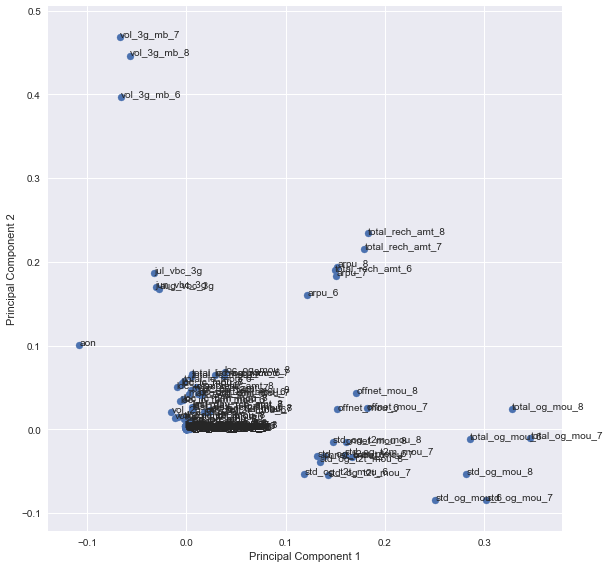

In [46]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [47]:
pca.explained_variance_ratio_

array([  2.56995446e-01,   1.56714047e-01,   1.09785232e-01,
         7.40128809e-02,   6.34127742e-02,   5.72711844e-02,
         5.14194531e-02,   3.46269122e-02,   2.51773315e-02,
         1.93945141e-02,   1.49420633e-02,   1.44004549e-02,
         1.32764660e-02,   1.16204708e-02,   1.07379609e-02,
         8.48320360e-03,   7.88681348e-03,   6.37110295e-03,
         5.46853853e-03,   5.12673590e-03,   4.97292188e-03,
         4.62241145e-03,   4.18879243e-03,   3.68801179e-03,
         3.12843307e-03,   2.86628131e-03,   2.54058871e-03,
         2.52625397e-03,   2.21916201e-03,   2.15432028e-03,
         1.87436780e-03,   1.66674809e-03,   1.60468588e-03,
         1.41928630e-03,   1.31461907e-03,   1.06385328e-03,
         8.85602223e-04,   8.29479321e-04,   8.16453486e-04,
         7.51471794e-04,   7.17544045e-04,   6.72168729e-04,
         6.31708268e-04,   6.05913677e-04,   5.65146817e-04,
         5.20993942e-04,   5.07515812e-04,   4.26480336e-04,
         4.14583759e-04,

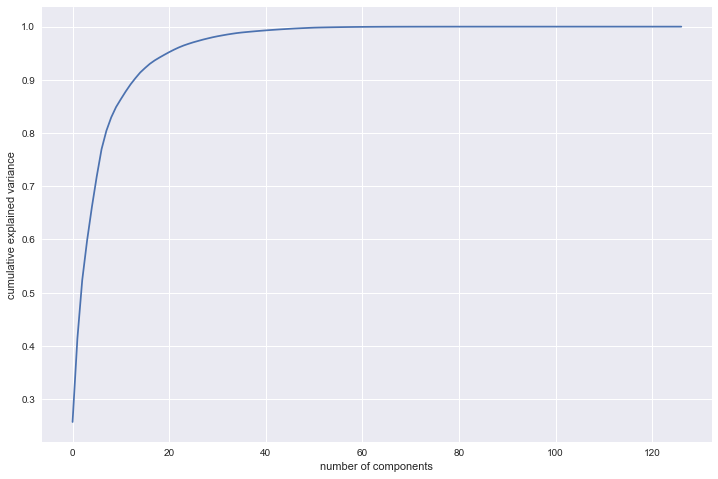

In [48]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [50]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=20)

In [51]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape
test=pd.DataFrame(df_train_pca)
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-247.96,-299.55,231.53,-758.16,-476.60,40.10,-184.07,433.34,89.82,42.55,52.30,-60.05,-150.06,-46.95,34.45,44.68,235.49,105.13,13.81,-78.04
1,2107.97,-619.67,-337.97,-1911.05,837.44,-706.19,-837.19,656.72,565.16,-107.68,-129.31,202.32,-637.41,-228.94,-319.29,948.97,-381.53,-242.32,449.92,-99.99
2,-595.08,-1158.21,-952.80,555.73,-383.90,138.95,826.38,28.47,209.58,74.96,-8.47,-46.34,-12.22,-77.19,-581.16,-20.75,-33.51,-16.46,-100.86,-140.47
3,6066.07,-892.70,-1788.01,1675.49,129.00,105.07,593.11,553.90,-68.61,-25.43,-41.48,-72.53,318.94,40.83,265.61,-142.90,42.77,6.61,-192.93,44.71
4,-1071.88,-481.16,-97.21,-437.96,-793.13,65.01,51.14,138.88,53.81,-132.01,73.28,-40.76,61.32,-171.33,93.65,-45.67,-237.65,-38.56,-114.31,100.14


In [52]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

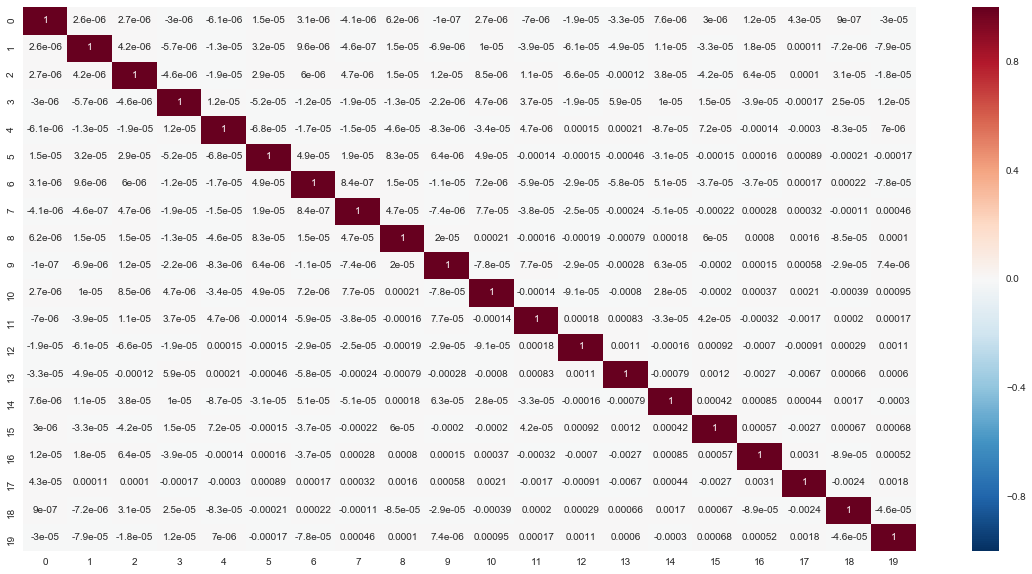

In [53]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [54]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.00314056046506 , min corr:  -0.00668667468336


In [55]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8659, 20)

In [56]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [57]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.84'

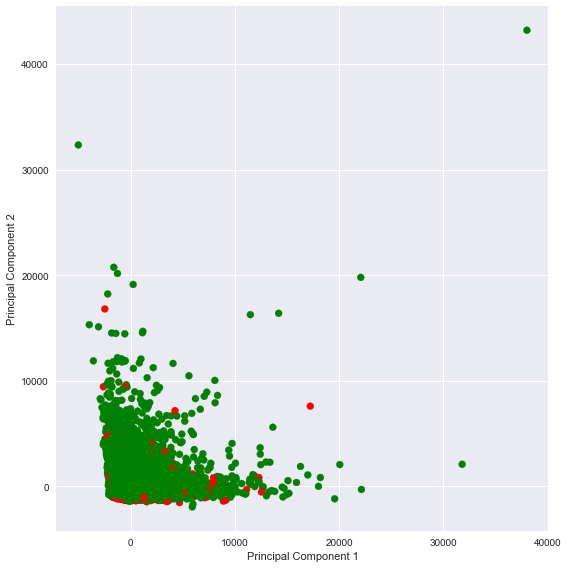

In [58]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()